In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 100)

In [ ]:
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
print("Shape:", df.shape)
df.head()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))
print("\nNumeric describe:")
df.describe().T


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


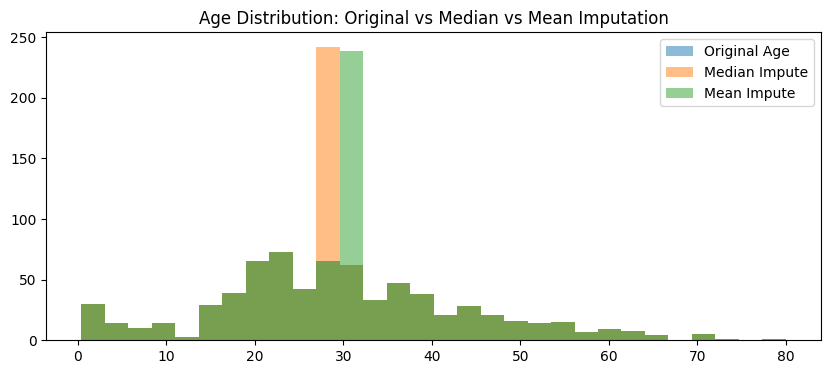

In [ ]:
df_median_imp = df.copy()
df_median_imp['Age'] = df_median_imp['Age'].fillna(df_median_imp['Age'].median())

df_mean_imp = df.copy()
df_mean_imp['Age'] = df_mean_imp['Age'].fillna(df_mean_imp['Age'].mean())

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(df['Age'].dropna(), bins=30, alpha=0.5, label='Original Age')
plt.hist(df_median_imp['Age'], bins=30, alpha=0.5, label='Median Impute')
plt.hist(df_mean_imp['Age'], bins=30, alpha=0.5, label='Mean Impute')
plt.legend()
plt.title("Age Distribution: Original vs Median vs Mean Imputation")
plt.show()

In [ ]:
df_mode_imp = df.copy()
df_mode_imp['Embarked'] = df_mode_imp['Embarked'].fillna(df_mode_imp['Embarked'].mode()[0])

df_unknown_imp = df.copy()
df_unknown_imp['Embarked'] = df_unknown_imp['Embarked'].fillna('Unknown')

print("Mode Fill:\n", df_mode_imp['Embarked'].value_counts())
print("\nUnknown Fill:\n", df_unknown_imp['Embarked'].value_counts())

Mode Fill:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Unknown Fill:
 Embarked
S          644
C          168
Q           77
Unknown      2
Name: count, dtype: int64


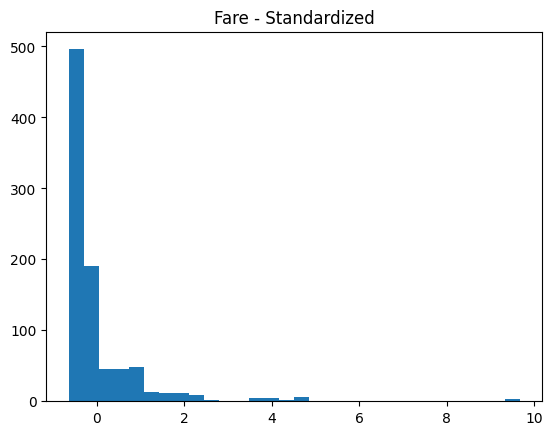

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

sc_std = StandardScaler()
fare_std = sc_std.fit_transform(df_median_imp[['Fare']])

plt.hist(fare_std.flatten(), bins=30)
plt.title("Fare - Standardized")
plt.show()

In [ ]:
from sklearn.preprocessing import Normalizer

af = df_median_imp[['Age', 'Fare']].dropna()

normalizer = Normalizer()
af_norm = normalizer.fit_transform(af)

print("First 5 normalized vectors:\n", af_norm[:5])

First 5 normalized vectors:
 [[0.94975704 0.31298812]
 [0.47041706 0.88244422]
 [0.95655127 0.29156418]
 [0.55033828 0.83494178]
 [0.97455519 0.22414769]]


In [ ]:
enc = OrdinalEncoder()
ord_demo = df_median_imp[['Embarked']].copy()
ord_vals = enc.fit_transform(ord_demo)
print("Ordinal encoding shape:", ord_vals.shape)

ohe_embarked = pd.get_dummies(df_median_imp['Embarked'], prefix='Embarked')
print("One-hot encoding shape:", ohe_embarked.shape)

print("One-hot encoded columns:", ohe_embarked.columns.tolist())

Ordinal encoding shape: (891, 1)
One-hot encoding shape: (891, 3)
One-hot encoded columns: ['Embarked_C', 'Embarked_Q', 'Embarked_S']


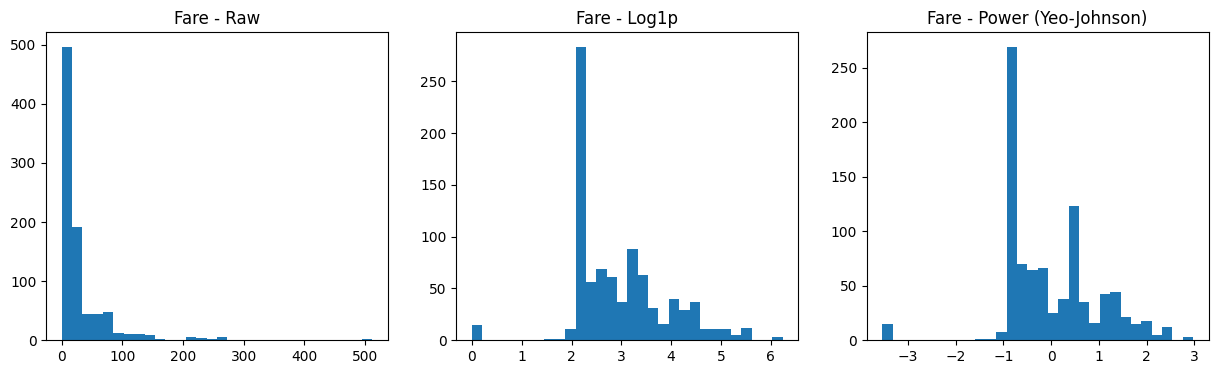

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)

imp = SimpleImputer(strategy='most_frequent')
df_imp = df.copy()
df_imp[['Age','Embarked']] = imp.fit_transform(df[['Age','Embarked']])

fare_raw = df_imp['Fare'].dropna().values.reshape(-1,1)
fare_log = np.log1p(fare_raw)

pt = PowerTransformer(method='yeo-johnson')
fare_pt = pt.fit_transform(fare_raw)

fig, axes = plt.subplots(1, 3, figsize=(15,4))
axes[0].hist(fare_raw.flatten(), bins=30)
axes[0].set_title('Fare - Raw')
axes[1].hist(fare_log.flatten(), bins=30)
axes[1].set_title('Fare - Log1p')
axes[2].hist(fare_pt.flatten(), bins=30)
axes[2].set_title('Fare - Power (Yeo-Johnson)')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
af_poly = poly.fit_transform(af[['Age','Fare']])

print("New features created:")
print(poly.get_feature_names_out(['Age','Fare']))


New features created:
['Age' 'Fare' 'Age^2' 'Age Fare' 'Fare^2']


In [ ]:
df.var(numeric_only=True).sort_values(ascending=False).head(2)


,0
PassengerId,66231.000000
Fare,2469.436846


In [ ]:
pca3 = PCA(n_components=3, random_state=42)
Z3 = pca3.fit_transform(df.select_dtypes(include=['number']).dropna())
print("Cumulative explained variance:", pca3.explained_variance_ratio_.cumsum())


Cumulative explained variance: [0.95704763 0.996994   0.99997071]
